## Imporing the necessary library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import power_transform, LabelEncoder, MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from scipy.stats import zscore
from sklearn.metrics import mean_squared_error
from category_encoders import BinaryEncoder
import warnings
warnings.filterwarnings('ignore')

## Getting the dataset

In [2]:
data = pd.read_csv(r'C:\Users\LENOVO\Documents\Post Graduation\data sets\Data-Science-ML-Capstone-Projects-master\Data-Science-ML-Capstone-Projects-master\avocado.csv')
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### Dropping the un-necessary column which is nothing but index

In [3]:
dataset = data.drop(columns = ['Unnamed: 0'])

In [4]:
dataset.shape

(18249, 13)

### Currently the data has 18249 rows and 13 columns

In [5]:
dataset.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

### There are no Null values on the data

### Creating a new feature from Date. I.e., Month and Day

In [6]:
dataset['Date'] = pd.to_datetime(dataset['Date'], errors = 'coerce')
dataset['Month'] = dataset['Date'].dt.month

In [7]:
dataset['Date'] = pd.to_datetime(dataset['Date'], errors = 'coerce')
dataset['Day'] = dataset['Date'].dt.day

In [8]:
dataset.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.372842,15.466984
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.525034,8.984552
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,7.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,10.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


### I can see from the above describe method most of the continuous data columns standard deviation is greater than the mean, there is a issue of outlier

#### Dropping the date column as the information is already extracted

In [9]:
dataset = dataset.drop(columns = 'Date')

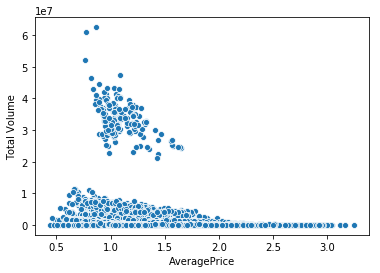

In [10]:
sns.scatterplot(y = 'Total Volume', x = 'AveragePrice', data = dataset )

### We can see that prices are lesser when there is increase in volume

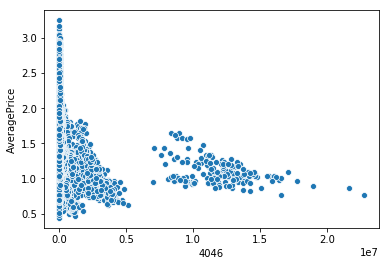

In [11]:
sns.scatterplot(x = '4046', y = 'AveragePrice', data = dataset )

### We can see that prices are lesser when there is increase in volume for 4046 type avocados

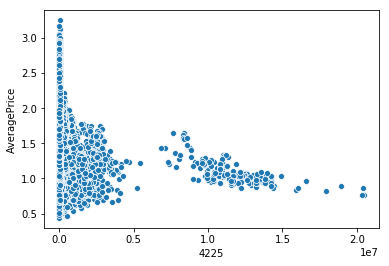

In [12]:
sns.scatterplot(x = '4225', y = 'AveragePrice', data = dataset )

### We can see that prices are lesser when there is increase in volume for 4225 type avocados

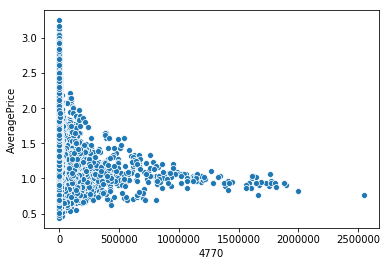

In [13]:
sns.scatterplot(x = '4770', y = 'AveragePrice', data = dataset )

### We can see that prices are almost same even when there is increase in volume for 4770 type avocados

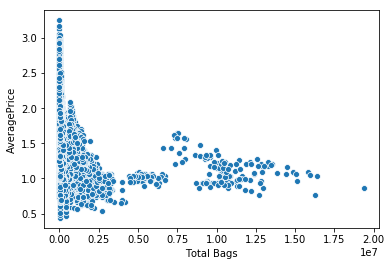

In [14]:
sns.scatterplot(x = 'Total Bags', y = 'AveragePrice', data = dataset )

### There is a slight decrease in Average price with the Total bags, large bags, Xlarge Bags and Small Bags

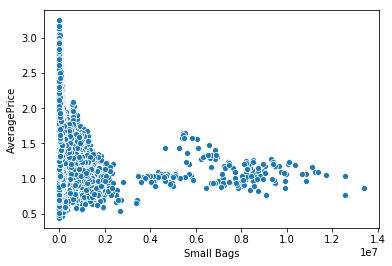

In [15]:
sns.scatterplot(x = 'Small Bags', y = 'AveragePrice', data = dataset )

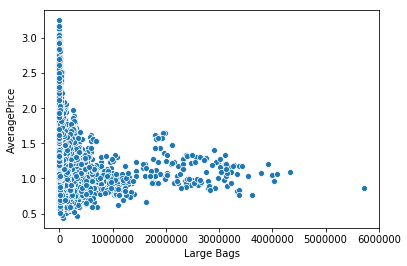

In [16]:
sns.scatterplot(x = 'Large Bags', y = 'AveragePrice', data = dataset )

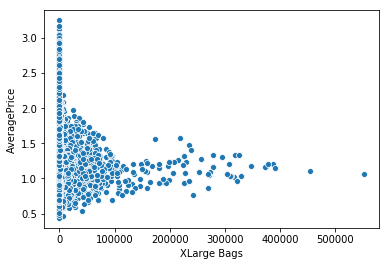

In [17]:
sns.scatterplot(x = 'XLarge Bags', y = 'AveragePrice', data = dataset )

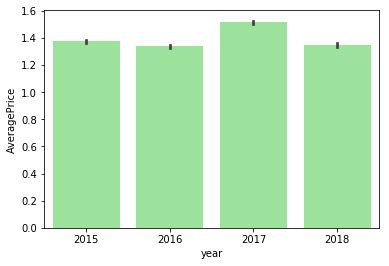

In [18]:
sns.barplot(x = 'year', y = 'AveragePrice',data = dataset, color = 'lightgreen')

### The Average prices were higher during the year 2017 and lowest during the year 2016

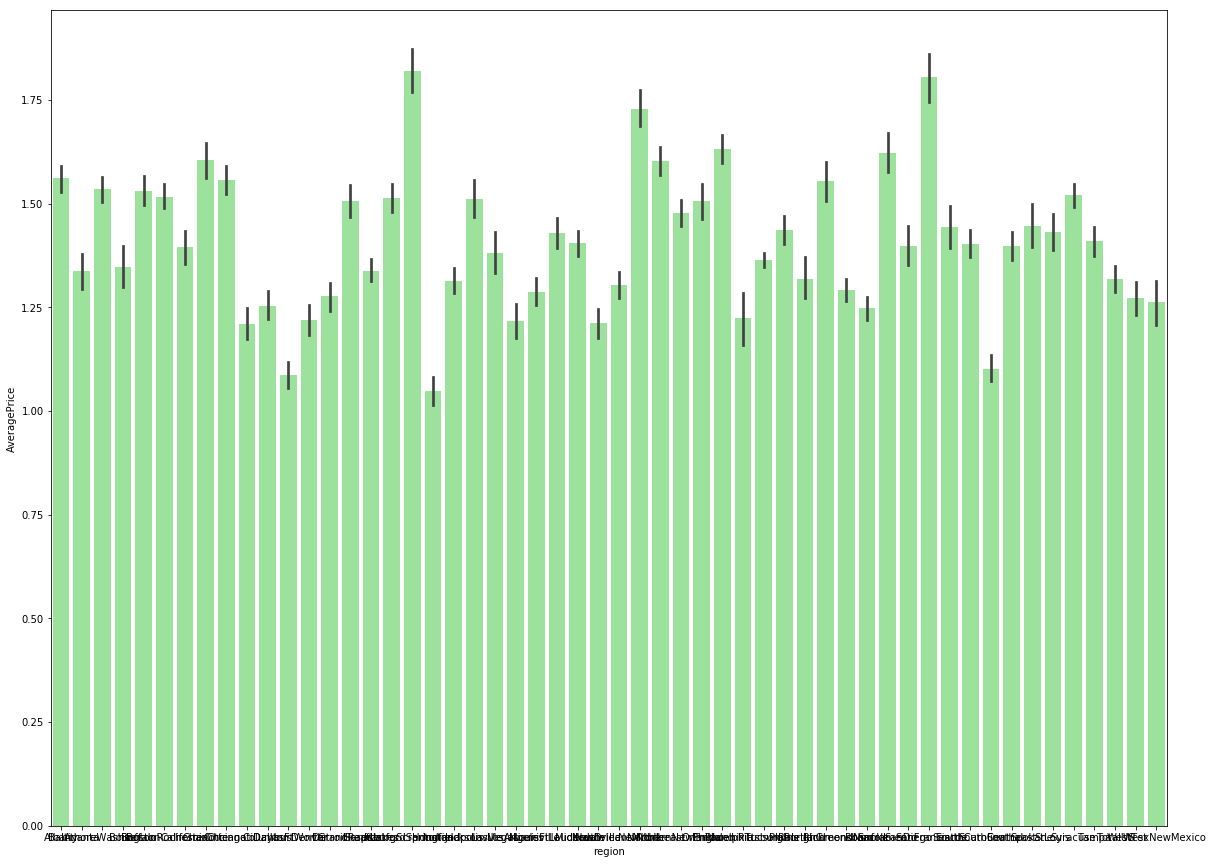

In [19]:
plt.figure(figsize = (20,15))
sns.barplot(x = 'region', y = 'AveragePrice',data = dataset, color = 'lightgreen')


### I can see that the prices vary with respect to region

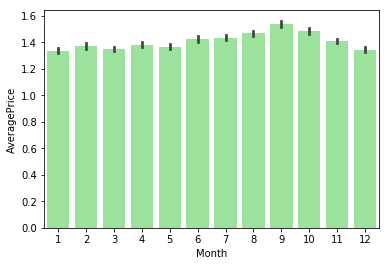

In [20]:
sns.barplot(x = 'Month', y = 'AveragePrice',data = dataset, color = 'lightgreen')

### the Average prices were highest during September and lowest during January and March

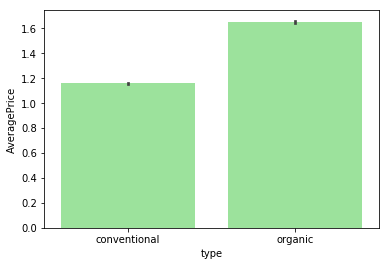

In [21]:
sns.barplot(x = 'type', y = 'AveragePrice',data = dataset, color = 'lightgreen')

### The Average price of organic avocado is higher when compared to conventional ones

### Upon checking all the variables are of numeric datatype except region and type

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  Month         18249 non-null  int64  
 13  Day           18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


### Using label Encoder to encode the region variable

In [23]:
"""
label = LabelEncoder()
enc = label.fit_transform(dataset['region'])
pd.Series(enc)
dataset['region'] = enc
"""

"\nlabel = LabelEncoder()\nenc = label.fit_transform(dataset['region'])\npd.Series(enc)\ndataset['region'] = enc\n"

### Encoding the 'type variable'

In [24]:
dataset = pd.get_dummies(data = dataset, columns = ['type','region'], drop_first = False)

### Checking for correlation coefficient for the independent variables over dependent variable

In [25]:
corr_data = dataset.corr()
corr_data['AveragePrice'].sort_values(ascending = False)

AveragePrice                  1.000000
type_organic                  0.615845
region_HartfordSpringfield    0.140782
region_SanFrancisco           0.135856
region_NewYork                0.109714
                                ...   
Total Bags                   -0.177088
4770                         -0.179446
Total Volume                 -0.192752
4046                         -0.208317
type_conventional            -0.615845
Name: AveragePrice, Length: 68, dtype: float64

### Upon reviewing, I can see that the highest correlation with the target variable is for type_organic and 4046

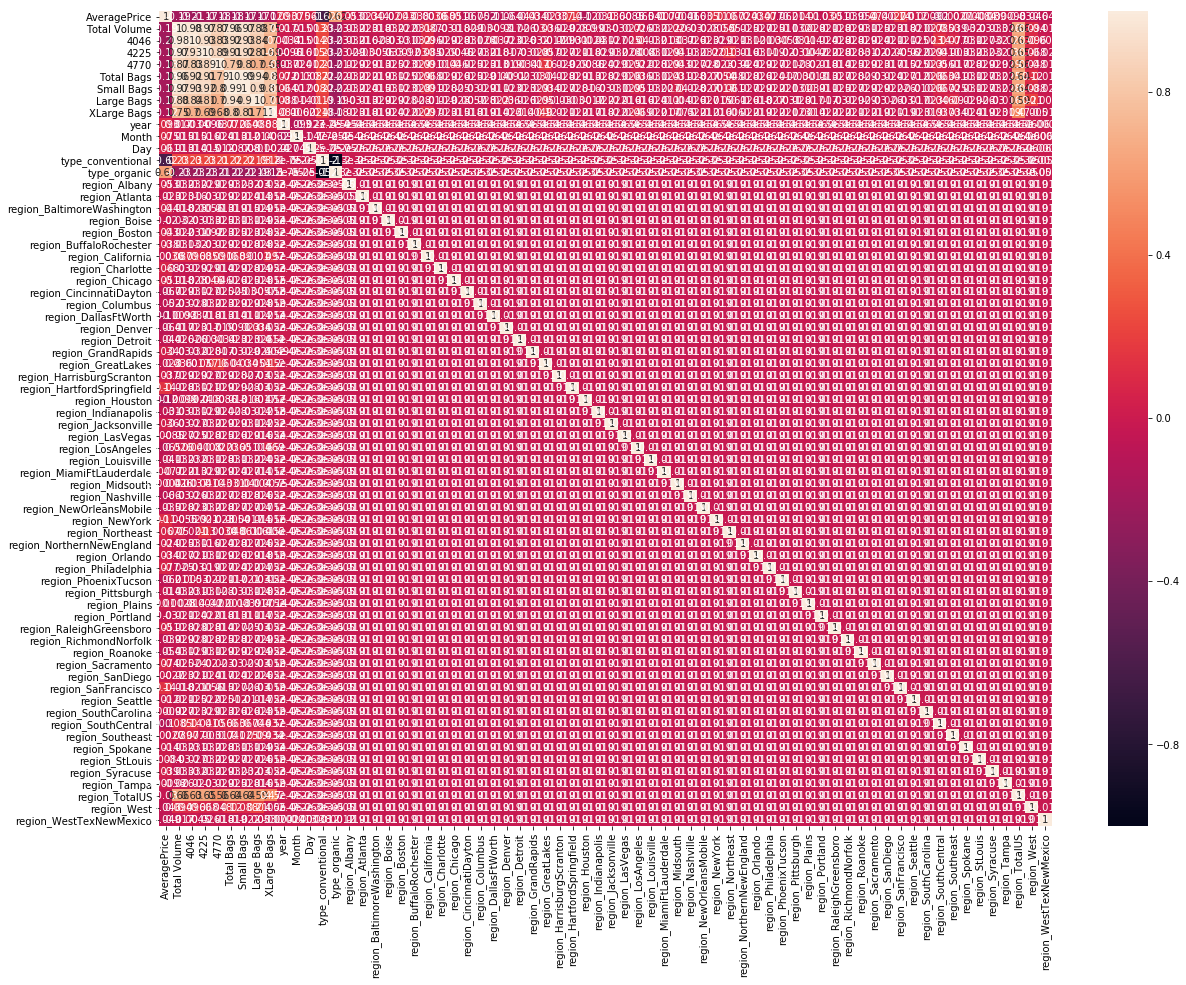

In [26]:
plt.figure(figsize = (20,15))
sns.heatmap(corr_data, annot = True )

#### Upon review, I can see that lot of independent variables are correlated with each other, we'll build the model and come back to treat the multi-collinearity

### Checking for outlers

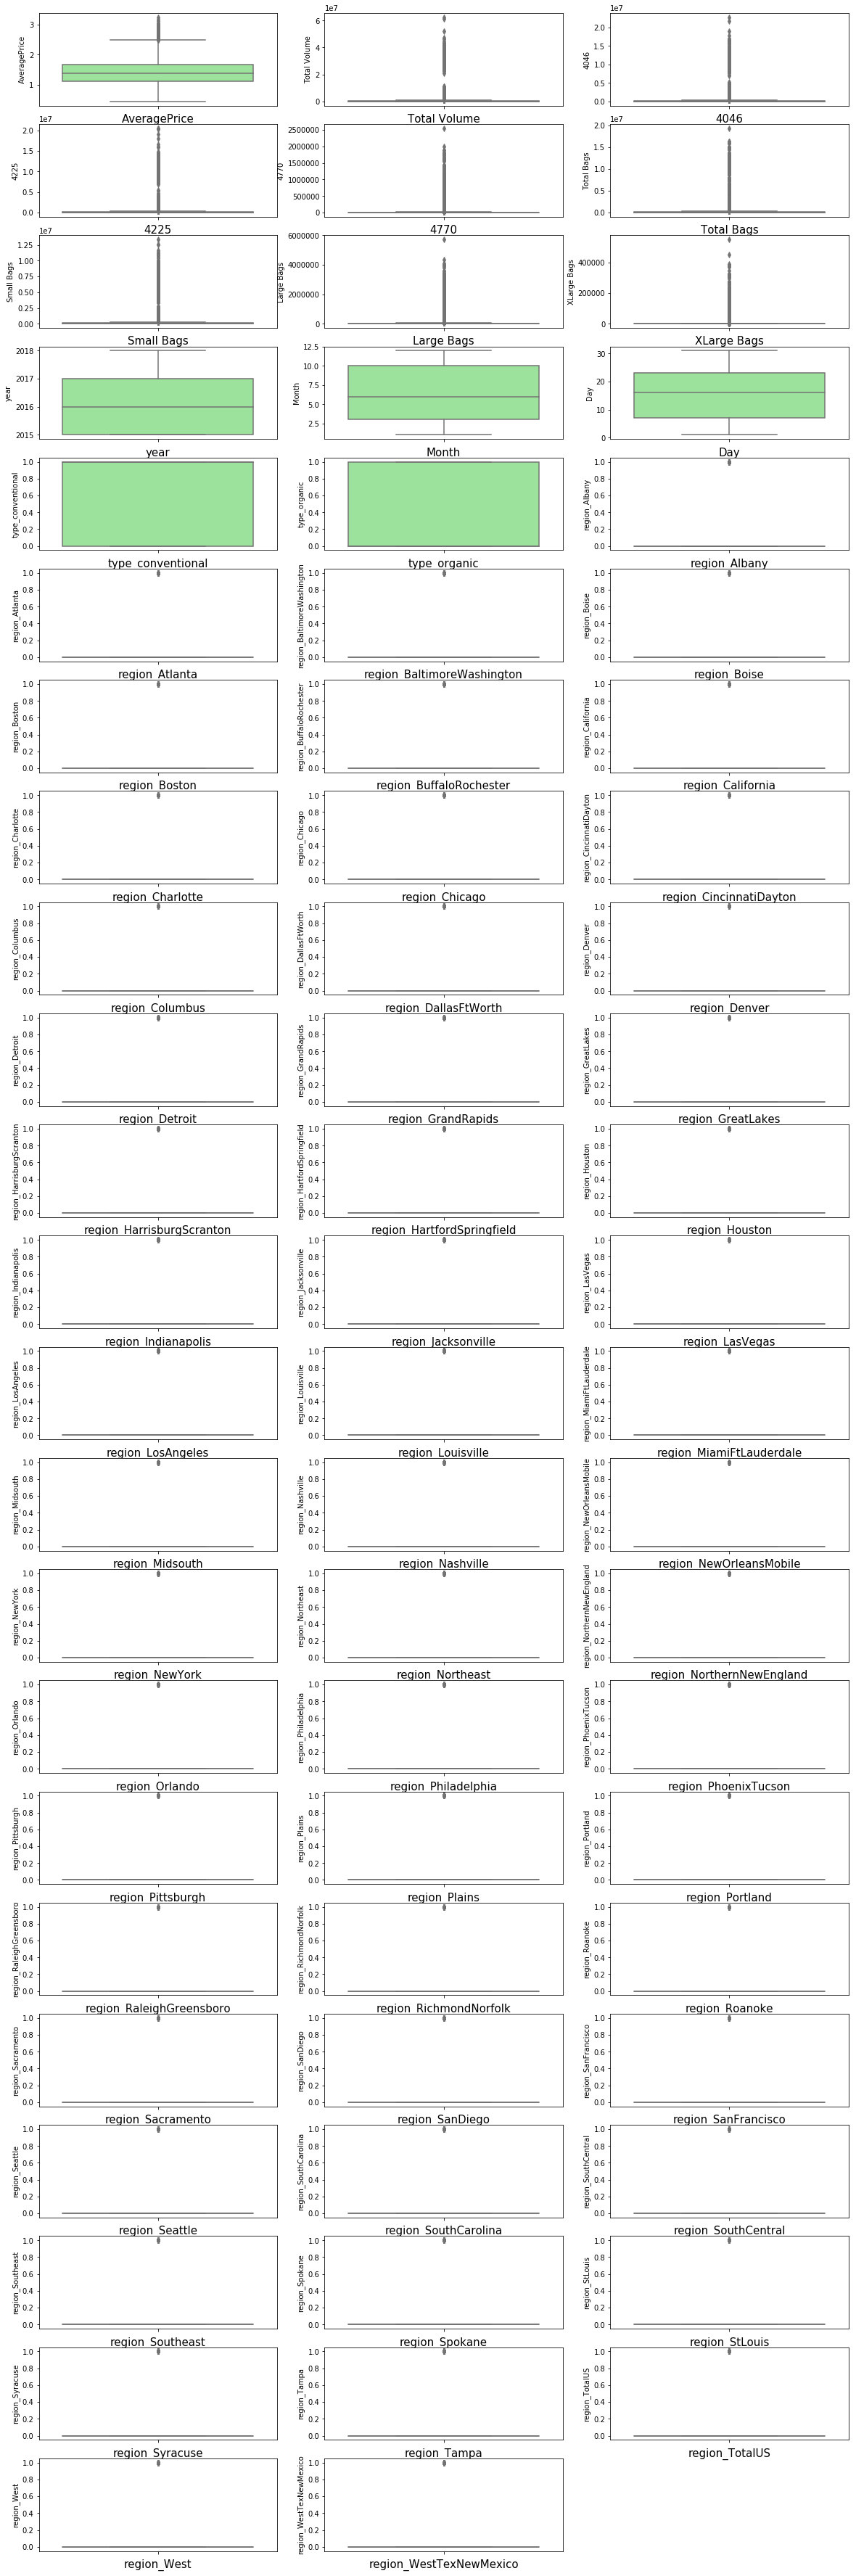

In [27]:
plt.figure(figsize =(20,70))
pltnum = 1
for i in dataset:
    if pltnum <= 75:
        plt.subplot(25,3,pltnum)
        sns.boxplot(dataset[i],color = 'lightgreen', orient = 'v')
        plt.xlabel(i,fontsize= 15)
    pltnum+=1
plt.show()

### Removing the outliers using zscore method

In [28]:
z = np.abs(zscore(dataset[['Total Volume','Total Bags','Large Bags','Small Bags','XLarge Bags','4046','4225','4770']]))

In [29]:
zdata = dataset[(z<1.6).all(axis = 1)]
print(zdata.shape)
print(dataset.shape)

(17056, 68)
(18249, 68)


### there is 6-7% data loss. Therefore proceeding with the outlier treatment

### using Standard scaler to scale the dataset

In [30]:
std = StandardScaler()
stsc =std.fit_transform(zdata)
join1 = pd.DataFrame(stsc, columns =zdata.columns)

In [31]:
zdata.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,...,0,0,0,0,0,0,0,0,0,0


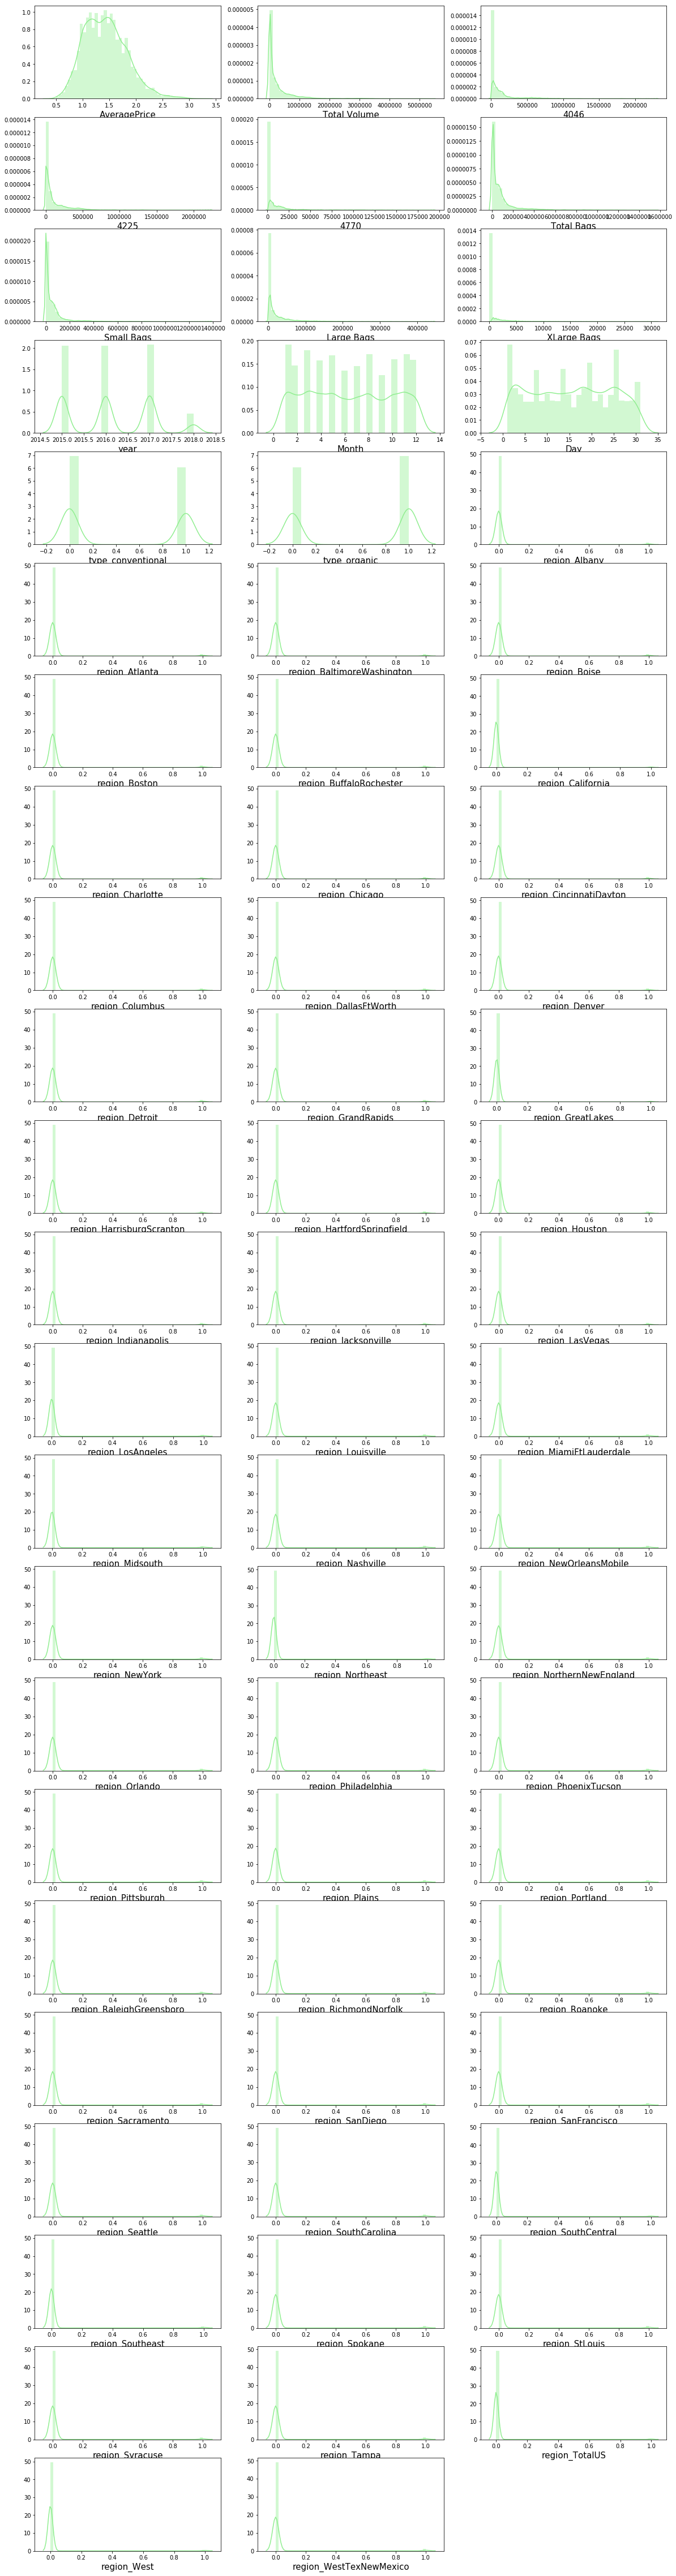

In [32]:
plt.figure(figsize =(20,90))
pltnum = 1
for i in zdata:
    if pltnum <= 75:
        plt.subplot(25,3,pltnum)
        sns.distplot(zdata[i],color = 'lightgreen')
        plt.xlabel(i,fontsize= 15)
    pltnum+=1
plt.show()

### lets control the skewness of the data

In [33]:
zdata.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
count,17056.000000,1.705600e+04,1.705600e+04,1.705600e+04,17056.000000,1.705600e+04,1.705600e+04,17056.000000,17056.000000,17056.000000,...,17056.000000,17056.000000,17056.000000,17056.000000,17056.000000,17056.000000,17056.000000,17056.000000,17056.000000,17056.000000
mean,1.429265,2.908169e+05,9.307101e+04,1.048626e+05,6846.745637,8.603427e+04,6.554261e+04,19726.636979,765.017604,2016.142472,...,0.019817,0.010319,0.014306,0.019817,0.019817,0.019817,0.019817,0.009791,0.010495,0.019583
std,0.402052,5.355383e+05,2.314946e+05,2.170566e+05,20238.023007,1.624374e+05,1.324307e+05,47181.025035,2816.672596,0.938439,...,0.139375,0.101060,0.118752,0.139375,0.139375,0.139375,0.139375,0.098468,0.101908,0.138565
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.130000,9.889475e+03,7.287250e+02,2.681205e+03,0.000000,4.415198e+03,2.372122e+03,85.235000,0.000000,2015.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.400000,8.407132e+04,5.972200e+03,2.232547e+04,121.580000,3.165877e+04,2.077244e+04,2051.275000,0.000000,2016.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.680000,3.218406e+05,7.889327e+04,9.941979e+04,3544.812500,8.938707e+04,6.933228e+04,15039.140000,26.717500,2017.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.250000,5.413533e+06,2.296069e+06,2.218374e+06,194003.800000,1.554658e+06,1.369895e+06,442491.140000,31253.980000,2018.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Total bags cannot be 0. Therefore, imputing the 0s in total bag

In [34]:
zdata['Total Bags'] = np.where(zdata['Total Bags']==0,zdata['Total Bags'].mean(), zdata['Total Bags'])

In [35]:
zdata.skew()

AveragePrice               0.536569
Total Volume               3.660956
4046                       4.769787
4225                       4.418028
4770                       5.009684
                             ...   
region_Syracuse            6.891307
region_Tampa               6.891307
region_TotalUS             9.957865
region_West                9.607901
region_WestTexNewMexico    6.935005
Length: 68, dtype: float64

### Splitting the x and y data along with the ordinal date type data

In [36]:
x = zdata.drop(columns =  'AveragePrice')
y = zdata['AveragePrice']

### Applying the transformation techniques on the data and post transformation, i'm getting the ordinal scaled data back

In [37]:
tr = power_transform(x,method = 'yeo-johnson')
trs = pd.DataFrame(tr, columns = x.columns)

In [38]:
trs.skew()

Total Volume              -0.027487
4046                      -0.049437
4225                      -0.065487
4770                       0.038306
Total Bags                -0.043594
                             ...   
region_Syracuse            6.891307
region_Tampa               6.891307
region_TotalUS             9.957865
region_West                9.607901
region_WestTexNewMexico    6.935005
Length: 67, dtype: float64

### I can still see skewness on the Xlarge Bags, looks like there is a lot of outlier in that column and it has very less correlation to the larget variable hence dropping the same

In [39]:
x = trs.drop(columns = 'XLarge Bags')

In [40]:
x.skew()

Total Volume              -0.027487
4046                      -0.049437
4225                      -0.065487
4770                       0.038306
Total Bags                -0.043594
                             ...   
region_Syracuse            6.891307
region_Tampa               6.891307
region_TotalUS             9.957865
region_West                9.607901
region_WestTexNewMexico    6.935005
Length: 66, dtype: float64

### Checking for outliers again and we can see there are no outliers in the data

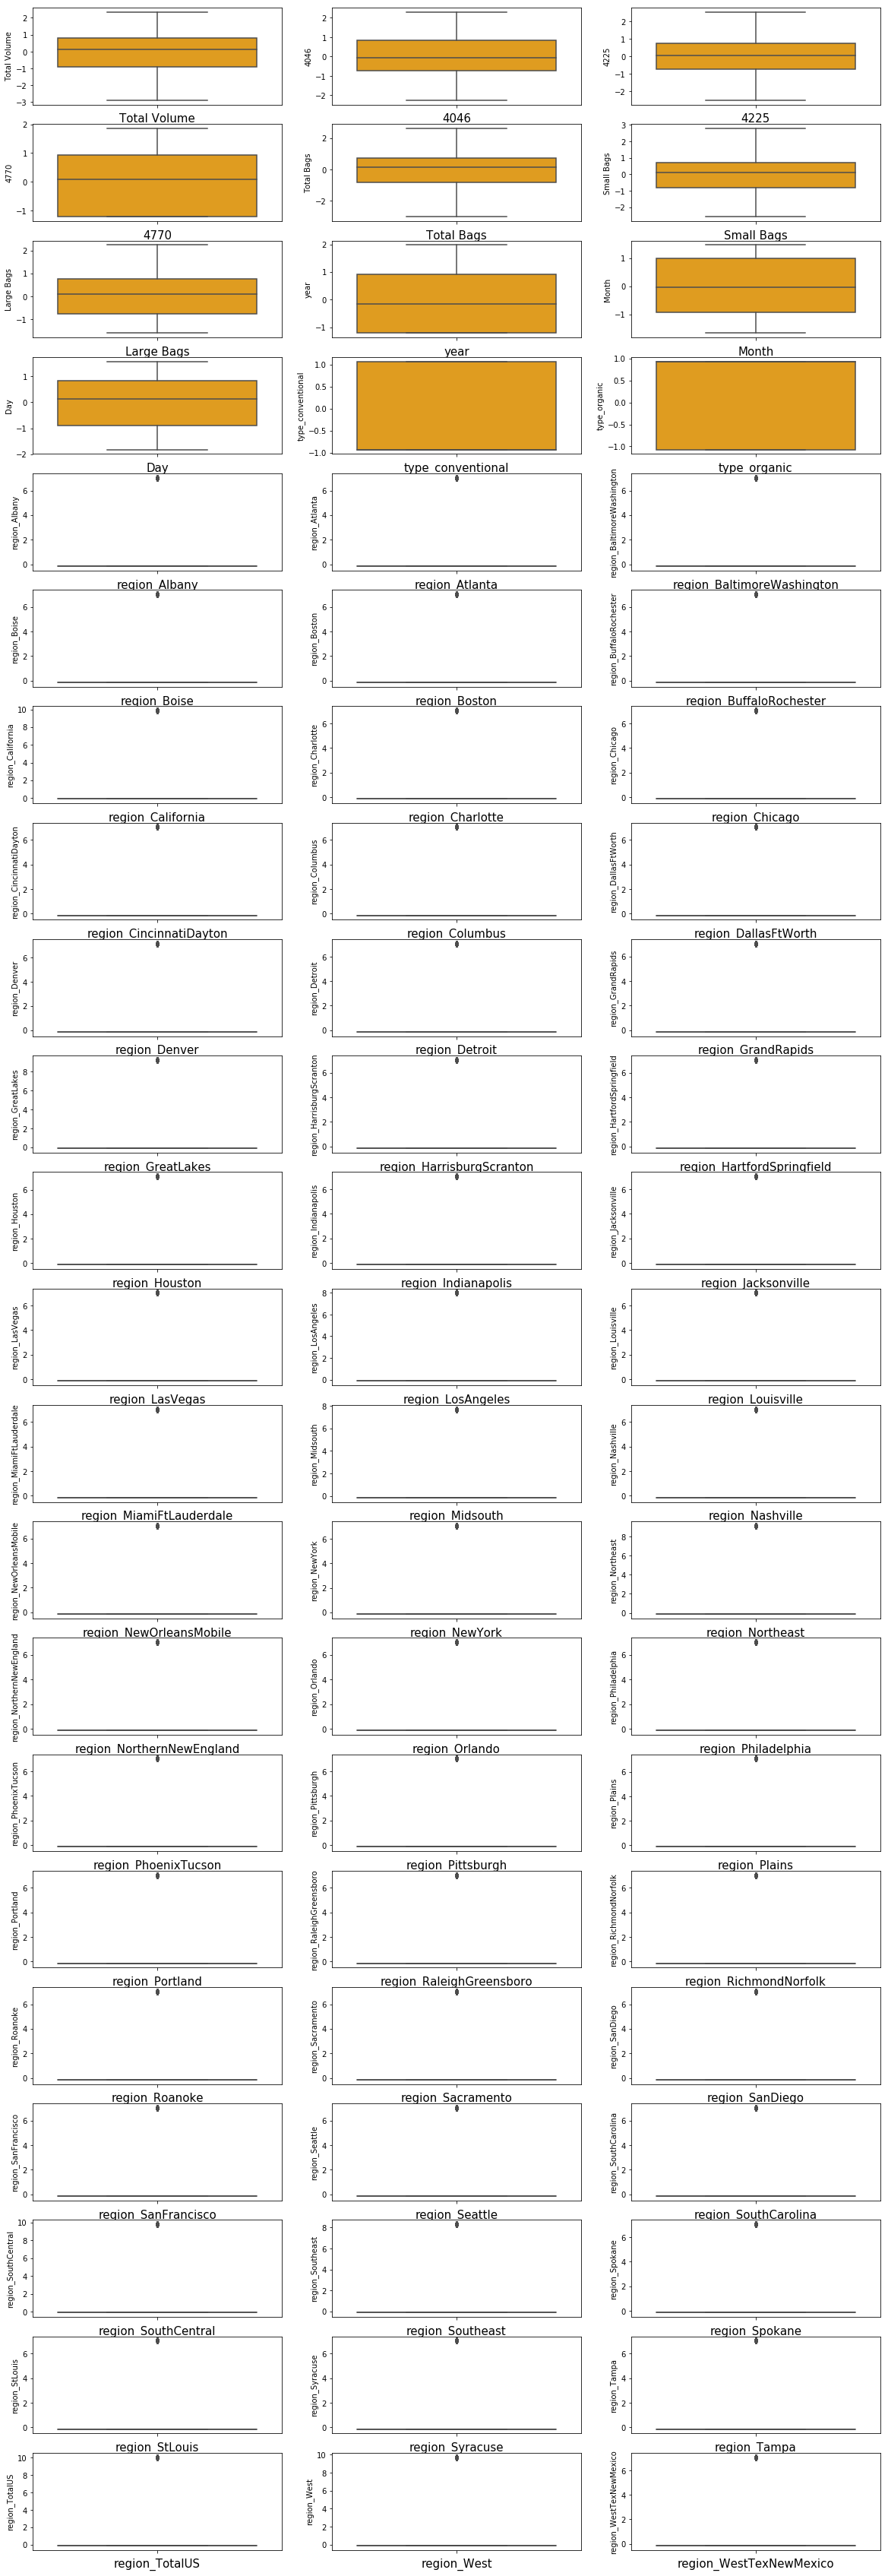

In [41]:
plt.figure(figsize =(20,70))
pltnum = 1
for i in x:
    if pltnum <= 75:
        plt.subplot(25,3,pltnum)
        sns.boxplot(x[i],color = 'orange', orient = 'v')
        plt.xlabel(i,fontsize= 15)
    pltnum+=1
plt.show()

### Checking for skewness

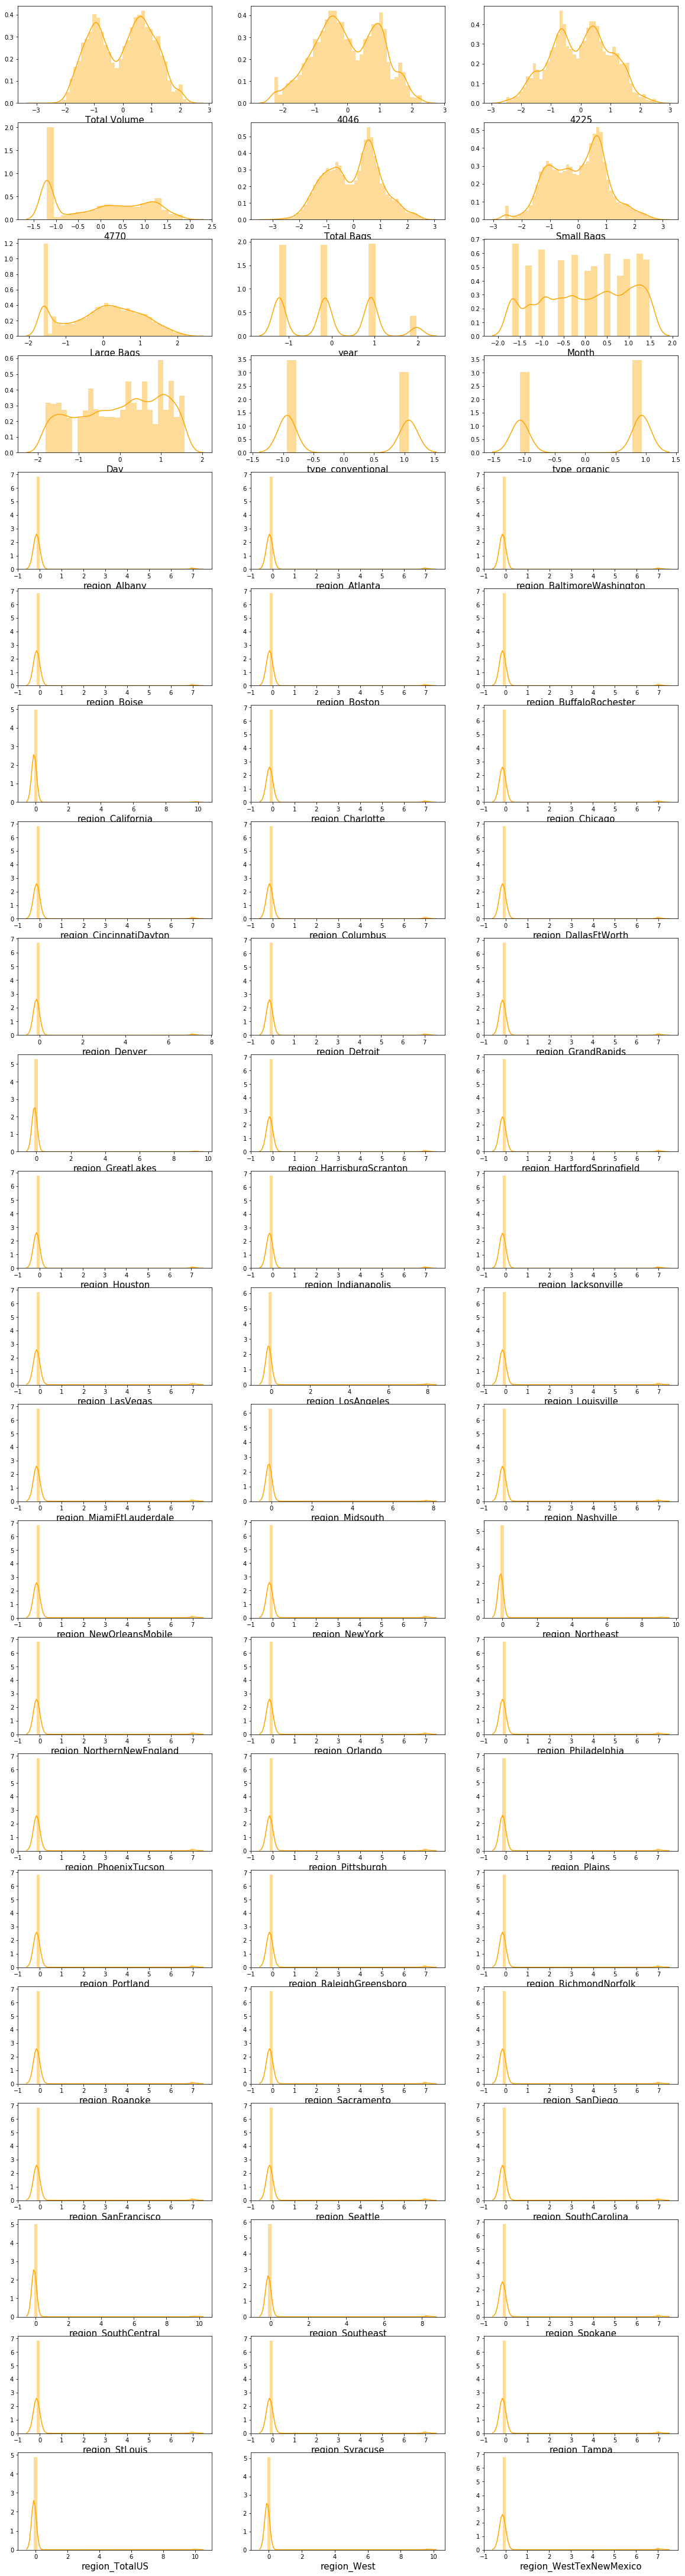

In [42]:
plt.figure(figsize =(20,90))
pltnum = 1
for i in x:
    if pltnum <= 75:
        plt.subplot(25,3,pltnum)
        sns.distplot(x[i],color = 'orange')
        plt.xlabel(i,fontsize= 15)
    pltnum+=1
plt.show()

In [43]:
x.describe()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,year,Month,Day,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
count,1.705600e+04,1.705600e+04,1.705600e+04,1.705600e+04,1.705600e+04,1.705600e+04,1.705600e+04,17056.000000,1.705600e+04,1.705600e+04,...,1.705600e+04,1.705600e+04,1.705600e+04,1.705600e+04,1.705600e+04,1.705600e+04,1.705600e+04,1.705600e+04,1.705600e+04,1.705600e+04
mean,-5.322639e-17,-1.031597e-15,-1.595334e-15,2.492965e-14,-2.800293e-17,3.283444e-16,1.938191e-15,0.000050,1.352479e-15,-7.154221e-16,...,2.899641e-15,-1.484823e-14,-8.167597e-15,2.953427e-15,3.018624e-15,3.081738e-15,3.166306e-15,1.438515e-14,1.347260e-14,-3.627701e-15
std,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029,1.000029e+00,1.000029e+00,...,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00
min,-2.887023e+00,-2.256692e+00,-2.503725e+00,-1.203484e+00,-3.028611e+00,-2.579815e+00,-1.603456e+00,-1.218068,-1.674576e+00,-1.819838e+00,...,-1.421891e-01,-1.021104e-01,-1.204718e-01,-1.421891e-01,-1.421891e-01,-1.421891e-01,-1.421891e-01,-9.943889e-02,-1.029862e-01,-1.413283e-01
25%,-8.962937e-01,-7.213753e-01,-7.283465e-01,-1.203484e+00,-8.077557e-01,-8.136203e-01,-7.637773e-01,-1.218068,-9.326042e-01,-9.021575e-01,...,-1.421891e-01,-1.021104e-01,-1.204718e-01,-1.421891e-01,-1.421891e-01,-1.421891e-01,-1.421891e-01,-9.943889e-02,-1.029862e-01,-1.413283e-01
50%,1.202900e-01,-7.791613e-02,6.059216e-02,9.389830e-02,1.371157e-01,9.536411e-02,8.530937e-02,-0.150947,-2.291767e-02,1.414068e-01,...,-1.421891e-01,-1.021104e-01,-1.204718e-01,-1.421891e-01,-1.421891e-01,-1.421891e-01,-1.421891e-01,-9.943889e-02,-1.029862e-01,-1.413283e-01
75%,7.998570e-01,8.409103e-01,7.333470e-01,9.295351e-01,7.083611e-01,7.238305e-01,7.625361e-01,0.914206,1.007114e+00,8.422551e-01,...,-1.421891e-01,-1.021104e-01,-1.204718e-01,-1.421891e-01,-1.421891e-01,-1.421891e-01,-1.421891e-01,-9.943889e-02,-1.029862e-01,-1.413283e-01
max,2.342631e+00,2.295702e+00,2.524476e+00,1.852204e+00,2.620126e+00,2.781731e+00,2.243699e+00,1.977229,1.474283e+00,1.575029e+00,...,7.032890e+00,9.793319e+00,8.300701e+00,7.032890e+00,7.032890e+00,7.032890e+00,7.032890e+00,1.005643e+01,9.710042e+00,7.075724e+00


### Dropping the columns with multi-collenearity

In [44]:
x = x.drop(columns = ['Total Volume','Total Bags','type_conventional'])

In [45]:
#x = x.drop(columns = ['Small Bags'])

In [46]:
#x = x.drop(columns = ['Total Bags'])

## Checking for correlation again

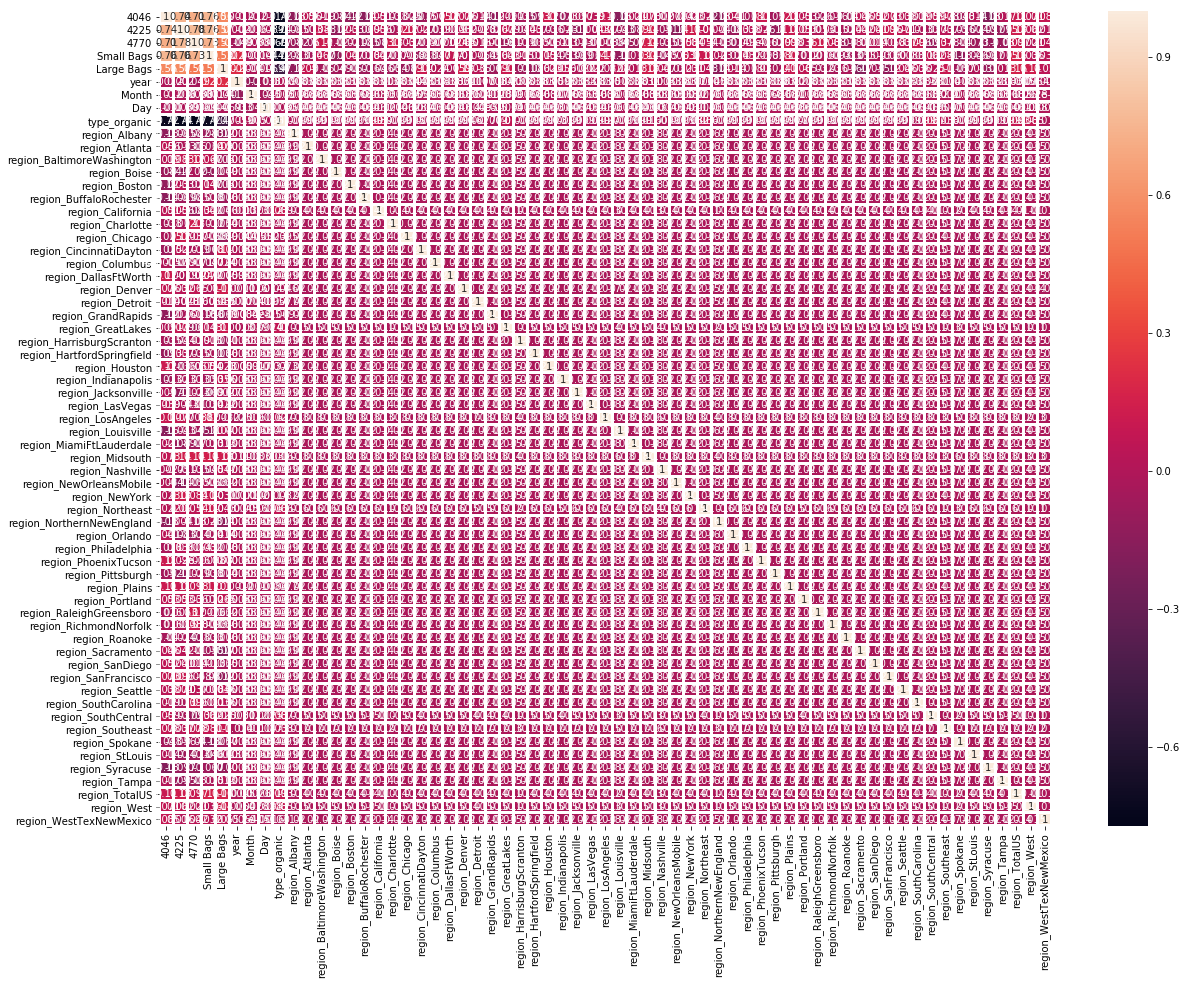

In [47]:
corx = x.corr()
plt.figure(figsize = (20,15))
sns.heatmap(corx,annot= True, linewidths=2)

### Finding the best random state

In [48]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
rs = 0
for i in range(0,2000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = i, test_size = 0.3)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    tr_score = lr.score(x_train,y_train)
    ts_score = lr.score(x_test,y_test)
    if round(tr_score*100,1) == round(ts_score*100,1):
        if i> rs:
            rs = i
print('the best random state is', rs)

the best random state is 1977


### Splitting the data

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state =rs)

## Model 1 Linear Regression

In [50]:
lin = LinearRegression()
lin.fit(x_train,y_train)
lin_pred = lin.predict(x_test)
lin_score = lin.score(x_test,y_test)
lin_score

0.6042512552346098

In [51]:
lin_rmse = np.sqrt(mean_squared_error(y_test,lin_pred))
print('RMSE for Linear Regression: ', lin_rmse)

RMSE for Linear Regression:  0.25100637129650694


## Model 2 Random Forest Regressor

In [52]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_pred = rfr.predict(x_test)
rfr_score = rfr.score(x_test,y_test)
rfr_score

0.8646901335754053

In [53]:
rfr_rmse = np.sqrt(mean_squared_error(y_test,rfr_pred))
print('RMSE for Random Forest Regression: ', rfr_rmse)

RMSE for Random Forest Regression:  0.1467708147079293


## Model 3 Extra Trees Regressor

In [54]:
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor()
et.fit(x_train,y_train)
et_pred = et.predict(x_test)
et_score = et.score(x_test,y_test)
et_score

0.8972260673641057

In [55]:
et_rmse = np.sqrt(mean_squared_error(y_test,et_pred))
print('RMSE for Extra Trees Regression: ', et_rmse)

RMSE for Extra Trees Regression:  0.12791352281879353


## Model 4  XGBoost Regressor

In [56]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train,y_train)
xgb_pred = xgb.predict(x_test)
xgb_score = xgb.score(x_test,y_test)
xgb_score

0.8790885982573365

In [57]:
xgb_rmse = np.sqrt(mean_squared_error(y_test,xgb_pred))
print('RMSE for XGB Regression: ', xgb_rmse)

RMSE for XGB Regression:  0.13874220753957375


## Model 5 Gradient Boosting Regressor

In [58]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
gb_pred = gb.predict(x_test)
gb_score = gb.score(x_test,y_test)
gb_score

0.698438421246267

In [59]:
gb_rmse = np.sqrt(mean_squared_error(y_test,gb_pred))
print('RMSE for AdaBoost Regression: ', gb_rmse)

RMSE for AdaBoost Regression:  0.21911039230939153


### Cross Validation scores

In [60]:
cv = cross_val_score(lin,x,y,scoring ='r2',cv = 7)
cv = cv.mean()
cv

0.2595260089336802

In [61]:
cv1 = cross_val_score(rfr,x,y,scoring ='r2',cv = 7)
cv1 = cv1.mean()
cv1

0.3242659857861055

In [62]:
cv2 = cross_val_score(et,x,y,scoring ='r2',cv = 7)
cv2 = cv2.mean()
cv2

0.41167034844112954

In [63]:
cv3 = cross_val_score(xgb,x,y,scoring ='r2',cv = 7)
cv3 = cv3.mean()
cv3

0.45034461058115965

In [64]:
cv4 = cross_val_score(gb, x,y,scoring = 'r2', cv = 7)
cv4 = cv4.mean()
cv4

0.34132040409565284

## Finding the best Model

In [65]:
mod = [lin_score, rfr_score,et_score,xgb_score, gb_score]
cv = [cv,cv1,cv2,cv3,cv4]
model = pd.DataFrame({})
model['Mod'] = mod
model['CV'] = cv
model['Diff'] = model['Mod'] -model['CV']
model

,Mod,CV,Diff
0,0.604251,0.259526,0.344725
1,0.864690,0.324266,0.540424
2,0.897226,0.411670,0.485556
3,0.879089,0.450345,0.428744
4,0.698438,0.341320,0.357118


### Hyper Parameter Tuning

In [66]:
params = {'n_estimators':[100,150,200,250],
         'max_depth':[7,9,11,13,15],
         'min_samples_split':[3,4,6,8],
         'bootstrap':[True, False],
         'n_jobs':[-1,-2,-3]}

### The Hyper parameter tuning is not getting done with XGB or Extra trees. Submitting the file

In [67]:
gcv = GridSearchCV(ExtraTreesRegressor(),params,cv =5, n_jobs = -1)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [7, 9, 11, 13, 15],
                         'min_samples_split': [3, 4, 6, 8],
                         'n_estimators': [100, 150, 200, 250],
                         'n_jobs': [-1, -2, -3]})

In [68]:
gcv.best_params_

{'bootstrap': False,
 'max_depth': 15,
 'min_samples_split': 4,
 'n_estimators': 150,
 'n_jobs': -3}

In [69]:
et_fnl = ExtraTreesRegressor()
et_fnl.fit(x_train,y_train)
fnl_pred = et_fnl.predict(x_test)
fnl_score = et_fnl.score(x_test,y_test)
fnl_score

0.8790885982573365

In [1]:
fnl_rmse = np.sqrt(mean_squared_error(y_test,fnl_pred))
print('RMSE for Final Extra trees Regression: ', fnl_rmse)

NameError: name 'np' is not defined

## Saving the Model

In [71]:
import joblib
joblib.dump(xgb_fnl,'Avocado.pkl')

['Avocado.pkl']